Importação das bibliotecas necessárias.

In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Para facilitar o entendimento do banco de dados, exclui-se a coluna 13 que não é necessária e renomeia-se as colunas.

In [2]:
data = pd.read_csv("Dataset_spine.csv")
data = data.drop(['Unnamed: 13'], axis=1)
data.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

In [3]:
y = data['class']
x = data.drop(['class'], axis = 1)
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


**EXPERIMENTO 1**

Utiliza-se apenas 20% dos dados do banco de dados para usar como treinamento e o restante será alocado para uso no teste.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

Utiliza-se três camadas de unidades de processamento intermediário, a função sigmoidal como função de ativação e 500 como númrero máximo de interações.

In [5]:
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)

Iteration 1, loss = 0.64699710
Iteration 2, loss = 0.64178186
Iteration 3, loss = 0.63778467
Iteration 4, loss = 0.63550049
Iteration 5, loss = 0.63354912
Iteration 6, loss = 0.63184340
Iteration 7, loss = 0.63065593
Iteration 8, loss = 0.62907951
Iteration 9, loss = 0.62756442
Iteration 10, loss = 0.62573880
Iteration 11, loss = 0.62380375
Iteration 12, loss = 0.62154187
Iteration 13, loss = 0.61931788
Iteration 14, loss = 0.61665258
Iteration 15, loss = 0.61375022
Iteration 16, loss = 0.61085673
Iteration 17, loss = 0.60773244
Iteration 18, loss = 0.60399598
Iteration 19, loss = 0.59951720
Iteration 20, loss = 0.59434223
Iteration 21, loss = 0.58813329
Iteration 22, loss = 0.58217381
Iteration 23, loss = 0.57602792
Iteration 24, loss = 0.56878620
Iteration 25, loss = 0.56105643
Iteration 26, loss = 0.55279656
Iteration 27, loss = 0.54479204
Iteration 28, loss = 0.53567061
Iteration 29, loss = 0.52626177
Iteration 30, loss = 0.51759395
Iteration 31, loss = 0.50849511
Iteration 32, los

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50, 25),
              max_iter=500, random_state=42, verbose=True)

In [6]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8225806451612904

Como pode-se ver, chegou-se a uma acurácia de 82% utilizando essa configuração de MLP.

In [7]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Abnormal       0.88      0.86      0.87        44
      Normal       0.68      0.72      0.70        18

    accuracy                           0.82        62
   macro avg       0.78      0.79      0.79        62
weighted avg       0.83      0.82      0.82        62



O relatório nos mostra que obteve-se uma *precision* de 88% nos casos anormais e 68% nos casos normais, e um *recall* de 86% nos casos anormais e 72% nos casos normais.

In [8]:
y.value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

Como o banco de dados é desbalanceado, visto o número de casos anormais e normais, o valor da acurácia não é um boa métrica para avaliar a MLP, portanto, deve-se atentar as métricas *precision* e *recall* do *report*, pois são elas que nos dirão se o MLP está classificando corretamente os casos. *Precision* se diz respeito a porcentagem dos casos selecionados daquela classe que foram classificados corretamente, já *recall* significa a porcentagem dos casos totais daquela classe que seriam classificados corretamente.

Vamos agora alterar alguns dos parâmetros da MLP:

**EXPERIMENTO 2**

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.67024566
Iteration 2, loss = 0.64236872
Iteration 3, loss = 0.63358321
Iteration 4, loss = 0.63752815
Iteration 5, loss = 0.64198806
Iteration 6, loss = 0.64131365
Iteration 7, loss = 0.63844617
Iteration 8, loss = 0.63671240
Iteration 9, loss = 0.63381061
Iteration 10, loss = 0.62967288
Iteration 11, loss = 0.62449397
Iteration 12, loss = 0.62125073
Iteration 13, loss = 0.61740508
Iteration 14, loss = 0.61322855
Iteration 15, loss = 0.60866736
Iteration 16, loss = 0.60480839
Iteration 17, loss = 0.59977024
Iteration 18, loss = 0.59384897
Iteration 19, loss = 0.58738872
Iteration 20, loss = 0.58148577
Iteration 21, loss = 0.57477812
Iteration 22, loss = 0.56644647
Iteration 23, loss = 0.55708925
Iteration 24, loss = 0.54686711
Iteration 25, loss = 0.53596548
Iteration 26, loss = 0.52380761
Iteration 27, loss = 0.51139480
Iteration 28, loss = 0.49765665
Iteration 29, loss = 0.48454518
Iteration 30, loss = 0.47046950
Iteration 31, loss = 0.45711939
Iteration 32, los

Como pode-se ver a acurácia, *precison* e o *recall* não mudaram muito.

Vamos agora tentar descobrir quais são as melhores variáveis para utilizar no nosso banco de dados da MLP para tentar maximizar a precisão dos casos.

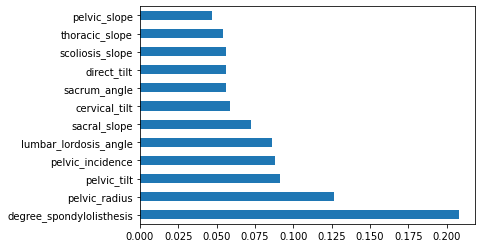

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

O gráfico nos mostra em ordem cresente as variáveis que mais impactam na classificação dos casos, logo, vamos descartar as primeiras 6 e utilizar o resto.

In [11]:
new_data = data[['degree_spondylolisthesis', 'pelvic_radius', 'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'class']]
y = new_data['class']
x = new_data.drop(['class'], axis = 1)

**EXPERIMENTO 3**

Vamos treinar várias configurações de MLP para tentar descobrir uma possível boa implementação de MLP para o problema. 

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)


Iteration 1, loss = 0.70112488
Iteration 2, loss = 0.68654367
Iteration 3, loss = 0.67462953
Iteration 4, loss = 0.66398732
Iteration 5, loss = 0.65432369
Iteration 6, loss = 0.64666128
Iteration 7, loss = 0.64006787
Iteration 8, loss = 0.63399689
Iteration 9, loss = 0.63055873
Iteration 10, loss = 0.62797376
Iteration 11, loss = 0.62460442
Iteration 12, loss = 0.62275161
Iteration 13, loss = 0.62038554
Iteration 14, loss = 0.61821419
Iteration 15, loss = 0.61588486
Iteration 16, loss = 0.61339693
Iteration 17, loss = 0.61064566
Iteration 18, loss = 0.60747443
Iteration 19, loss = 0.60388243
Iteration 20, loss = 0.60041992
Iteration 21, loss = 0.59622385
Iteration 22, loss = 0.59223184
Iteration 23, loss = 0.58780858
Iteration 24, loss = 0.58354370
Iteration 25, loss = 0.57911310
Iteration 26, loss = 0.57405196
Iteration 27, loss = 0.56849718
Iteration 28, loss = 0.56288560
Iteration 29, loss = 0.55697413
Iteration 30, loss = 0.55057633
Iteration 31, loss = 0.54448569
Iteration 32, los

**EXPERIMENTO 4**

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.92920079
Iteration 2, loss = 0.82382960
Iteration 3, loss = 0.74420212
Iteration 4, loss = 0.68556225
Iteration 5, loss = 0.65105628
Iteration 6, loss = 0.63663051
Iteration 7, loss = 0.63306369
Iteration 8, loss = 0.63498458
Iteration 9, loss = 0.63990479
Iteration 10, loss = 0.64611492
Iteration 11, loss = 0.64727877
Iteration 12, loss = 0.64367007
Iteration 13, loss = 0.63714182
Iteration 14, loss = 0.63000314
Iteration 15, loss = 0.62114728
Iteration 16, loss = 0.61419522
Iteration 17, loss = 0.60774688
Iteration 18, loss = 0.60491405
Iteration 19, loss = 0.60188012
Iteration 20, loss = 0.60046049
Iteration 21, loss = 0.59861906
Iteration 22, loss = 0.59550898
Iteration 23, loss = 0.59079922
Iteration 24, loss = 0.58449005
Iteration 25, loss = 0.57702586
Iteration 26, loss = 0.56996210
Iteration 27, loss = 0.56371703
Iteration 28, loss = 0.55889126
Iteration 29, loss = 0.55414330
Iteration 30, loss = 0.54803574
Iteration 31, loss = 0.53917196
Iteration 32, los

**EXPERIMENTO 5**

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
clf = MLPClassifier(max_iter=500, alpha=0.0001, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 10.16740382
Iteration 2, loss = 8.72312349
Iteration 3, loss = 7.04097728
Iteration 4, loss = 5.39742528
Iteration 5, loss = 4.03155684
Iteration 6, loss = 3.40629193
Iteration 7, loss = 3.37620165
Iteration 8, loss = 3.31027125
Iteration 9, loss = 2.84740245
Iteration 10, loss = 2.19060191
Iteration 11, loss = 1.64500178
Iteration 12, loss = 1.50660070
Iteration 13, loss = 1.45056473
Iteration 14, loss = 1.25470093
Iteration 15, loss = 0.97269961
Iteration 16, loss = 0.77595199
Iteration 17, loss = 0.71670520
Iteration 18, loss = 0.69661312
Iteration 19, loss = 0.63035526
Iteration 20, loss = 0.53767681
Iteration 21, loss = 0.47372156
Iteration 22, loss = 0.46338021
Iteration 23, loss = 0.46562388
Iteration 24, loss = 0.45813054
Iteration 25, loss = 0.43593972
Iteration 26, loss = 0.41629487
Iteration 27, loss = 0.41115255
Iteration 28, loss = 0.41266567
Iteration 29, loss = 0.41842357
Iteration 30, loss = 0.41325036
Iteration 31, loss = 0.40246088
Iteration 32, lo

**EXPERIMENTO 6**

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
clf = MLPClassifier(hidden_layer_sizes=(100,300,500), max_iter=500, alpha=0.0001, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 3.11633195
Iteration 2, loss = 5.09947393
Iteration 3, loss = 1.32677573
Iteration 4, loss = 1.65018899
Iteration 5, loss = 1.36021683
Iteration 6, loss = 0.52802483
Iteration 7, loss = 1.13053591
Iteration 8, loss = 0.55356086
Iteration 9, loss = 0.59264242
Iteration 10, loss = 0.66666054
Iteration 11, loss = 0.39058962
Iteration 12, loss = 0.48158225
Iteration 13, loss = 0.46870692
Iteration 14, loss = 0.34933909
Iteration 15, loss = 0.47135497
Iteration 16, loss = 0.40550304
Iteration 17, loss = 0.34032847
Iteration 18, loss = 0.42772497
Iteration 19, loss = 0.35686976
Iteration 20, loss = 0.35723171
Iteration 21, loss = 0.38204670
Iteration 22, loss = 0.32827453
Iteration 23, loss = 0.34746591
Iteration 24, loss = 0.34785470
Iteration 25, loss = 0.31989377
Iteration 26, loss = 0.35853932
Iteration 27, loss = 0.34038268
Iteration 28, loss = 0.32756211
Iteration 29, loss = 0.33521562
Iteration 30, loss = 0.31852814
Iteration 31, loss = 0.33022138
Iteration 32, los

Pode-se ver que as últimas duas configurações de MLP apresentam excelentes resultados de acurácia, *precision* e *recall*, portanto, são possíveis boas candidatas a serem implementadas.

A equipe levantou a hipótese de que o fato de a quantidade de dados "Abnormal" estar acima da quantidade de dados "Normal" está baixando a precisão para classificação de dados "Normal" nos primeiros exemplos deste ralatório e baixando a acurácia geral nos dois exemplos acima (melhores resultados até então). Para testar isso, vamos igualar a quantidade de dados "Abnormal" e "Normal" com duas abordagens. Primeiro, expluindo os 110 primeiros dados "Abnormal" e depois, excluindo 110 dados "Abnormal" de modo aleatório.


**EXPERIMENTO 7**

Abaixo, segue o exemplo excluindo os 110 primeiros dados "Abnormal", utilizando o dataset do primeiro experimento e o MLP classifier do primeiro experimento, ou seja, antes da aplicação de todas as melhorias propostas pelos experimentos acima:

In [16]:
data1 = pd.read_csv("Dataset_spine.csv")
data1 = data1.drop(['Unnamed: 13'], axis=1)
data1.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

new_data_copy = data1

new_data3 = new_data_copy.copy()

for i in range(110):
    new_data3.drop((i+1),axis=0,inplace=True)

y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Normal      100
Abnormal    100
Name: class, dtype: int64
Iteration 1, loss = 0.70557907
Iteration 2, loss = 0.70216837
Iteration 3, loss = 0.69914504
Iteration 4, loss = 0.69651227
Iteration 5, loss = 0.69426537
Iteration 6, loss = 0.69238677
Iteration 7, loss = 0.69084330
Iteration 8, loss = 0.68958895
Iteration 9, loss = 0.68856457
Iteration 10, loss = 0.68769780
Iteration 11, loss = 0.68690556
Iteration 12, loss = 0.68610178
Iteration 13, loss = 0.68520861
Iteration 14, loss = 0.68416510
Iteration 15, loss = 0.68293005
Iteration 16, loss = 0.68147986
Iteration 17, loss = 0.67980555
Iteration 18, loss = 0.67790815
Iteration 19, loss = 0.67579307
Iteration 20, loss = 0.67346696
Iteration 21, loss = 0.67093678
Iteration 22, loss = 0.66821015
Iteration 23, loss = 0.66529510
Iteration 24, loss = 0.66219665
Iteration 25, loss = 0.65891446
Iteration 26, loss = 0.65543999
Iteration 27, loss = 0.65175675
Iteration 28, loss = 0.64784587
Iteration 29, loss = 0.64369002
Iteration 30, loss = 0.

Percebe-se que podemos alcançar resultados similares aos dois melhores resultados apresentados até então apenas com esta técnica.

**EXPERIMENTO 8**

Abaixo, segue o exemplo excluindo 110 dados "Abnormal" de forma randômica, utilizando o dataset do primeiro experimento e o MLP classifier do primeiro experimento, ou seja, antes da aplicação de todas as melhorias propostas pelos experimentos acima. A intenção, assim como no experimento passado, é igualar o número de casos "Abnormal" e "Normal", mas agora de modo randômico:

In [17]:
import random
data1 = pd.read_csv("Dataset_spine.csv")
data1 = data1.drop(['Unnamed: 13'], axis=1)
data1.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

new_data_copy = data1

new_data3 = new_data_copy.copy()

range_list = random.sample(range(210), 110)

for i in range_list:
    new_data3.drop(i,axis=0,inplace=True)

y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

Normal      100
Abnormal    100
Name: class, dtype: int64
Iteration 1, loss = 0.70513345
Iteration 2, loss = 0.70192143
Iteration 3, loss = 0.69911717
Iteration 4, loss = 0.69671523
Iteration 5, loss = 0.69470612
Iteration 6, loss = 0.69307265
Iteration 7, loss = 0.69178587
Iteration 8, loss = 0.69080486
Iteration 9, loss = 0.69007729
Iteration 10, loss = 0.68953920
Iteration 11, loss = 0.68911688
Iteration 12, loss = 0.68873276
Iteration 13, loss = 0.68831439
Iteration 14, loss = 0.68780218
Iteration 15, loss = 0.68715435
Iteration 16, loss = 0.68634809
Iteration 17, loss = 0.68537682
Iteration 18, loss = 0.68424492
Iteration 19, loss = 0.68296258
Iteration 20, loss = 0.68154238
Iteration 21, loss = 0.67999714
Iteration 22, loss = 0.67833834
Iteration 23, loss = 0.67657545
Iteration 24, loss = 0.67471562
Iteration 25, loss = 0.67276381
Iteration 26, loss = 0.67072139
Iteration 27, loss = 0.66858340
Iteration 28, loss = 0.66633784
Iteration 29, loss = 0.66396808
Iteration 30, loss = 0.

Percebe-se que as precisões e a acurácia aumentaram significativamente com relação aos primeiros testes deste ralatório, antes das melhorias sujeridas. Entretanto, apesar de os resultados serem satisfatórios, algumas das melhorias propostas acima, apresentam resultados melhores do que esta última abordagem..

**EXPERIMENTO 9**

Agora, uniremos a melhor abordagem para igualar a quantidade de casos que é retirar os 110 primeiros casos "Abnormal" do dataset com o melhor resultado das melhorias sugeridas na manipulação de parâmetros do MLP:

In [18]:
data1 = pd.read_csv("Dataset_spine.csv")
data1 = data1.drop(['Unnamed: 13'], axis=1)
data1.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

new_data_copy = data1

new_data3 = new_data_copy.copy()

for i in range(110):
    new_data3.drop((i+1),axis=0,inplace=True)

y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
clf = MLPClassifier(hidden_layer_sizes=(100,300,500), max_iter=500, alpha=0.0001, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Normal      100
Abnormal    100
Name: class, dtype: int64
Iteration 1, loss = 0.88583523
Iteration 2, loss = 4.59706190
Iteration 3, loss = 0.14468187
Iteration 4, loss = 2.30710921
Iteration 5, loss = 1.01540198
Iteration 6, loss = 0.17820600
Iteration 7, loss = 0.47534198
Iteration 8, loss = 0.91759087
Iteration 9, loss = 0.79470727
Iteration 10, loss = 0.40313085
Iteration 11, loss = 0.18144676
Iteration 12, loss = 0.20182031
Iteration 13, loss = 0.34147100
Iteration 14, loss = 0.43861550
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
0.9
              precision    recall  f1-score   support

    Abnormal       0.90      0.90      0.90        10
      Normal       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



Percebemos que, apesar de significante melhora com relação aos primeiros experimentos e de resultados similares aos experimentos que testaram apenas melhorias nos parâmetros do MLP, este experimento ainda está aquém do resultado do experimento 7, onde apenas o dataset foi manipulado não randomicamente de forma a igualar o número de casos "Abnormal" e "Normal".

**EXPERIMENTO 10**

Agora tentaremos uma abordagem similar à do experimento anterior, unindo as melhorias nos parâmetros MLP com o ato de igualar o número de casos, mas agora de modo randômico:

In [19]:
data1 = pd.read_csv("Dataset_spine.csv")
data1 = data1.drop(['Unnamed: 13'], axis=1)
data1.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

new_data_copy = data1

new_data3 = new_data_copy.copy()

range_list = random.sample(range(210), 110)

for i in range_list:
    new_data3.drop(i,axis=0,inplace=True)

y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
clf = MLPClassifier(hidden_layer_sizes=(100,300,500), max_iter=500, alpha=0.0001, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Normal      100
Abnormal    100
Name: class, dtype: int64
Iteration 1, loss = 9.03506547
Iteration 2, loss = 2.30731002
Iteration 3, loss = 1.24907622
Iteration 4, loss = 0.92229256
Iteration 5, loss = 1.13950849
Iteration 6, loss = 0.55907691
Iteration 7, loss = 0.44209308
Iteration 8, loss = 0.85552499
Iteration 9, loss = 0.57671078
Iteration 10, loss = 0.39055063
Iteration 11, loss = 0.51449169
Iteration 12, loss = 0.58551066
Iteration 13, loss = 0.49050778
Iteration 14, loss = 0.33587854
Iteration 15, loss = 0.34750729
Iteration 16, loss = 0.45980375
Iteration 17, loss = 0.35891480
Iteration 18, loss = 0.28171981
Iteration 19, loss = 0.33697166
Iteration 20, loss = 0.37326374
Iteration 21, loss = 0.32694228
Iteration 22, loss = 0.26284746
Iteration 23, loss = 0.28437700
Iteration 24, loss = 0.32407653
Iteration 25, loss = 0.27515876
Iteration 26, loss = 0.24571253
Iteration 27, loss = 0.27354394
Iteration 28, loss = 0.28372110
Iteration 29, loss = 0.25300767
Iteration 30, loss = 0.

In [ ]:
Percebe-se que este foi um dos melhores resultados alcançados até então com relação às precisões e à acurácia.